In [97]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
# import xgboost as xgb
import sklearn
import scipy
import numpy
import math
import json
import sys
import csv
import os
from quilt.data.ResidentMario import missingno_data
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


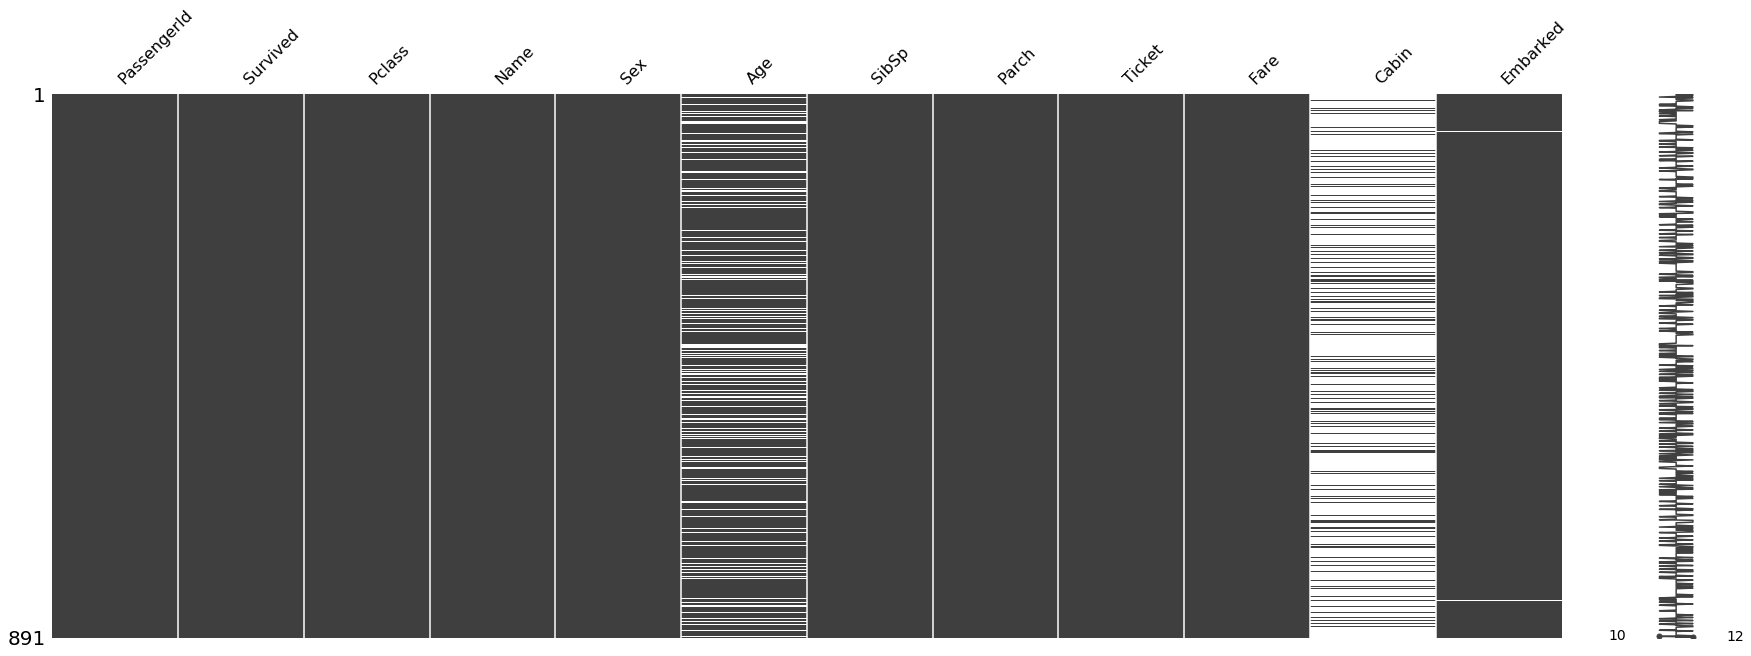

In [5]:
import missingno as msno
msno.matrix(train, figsize = (30,10))

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

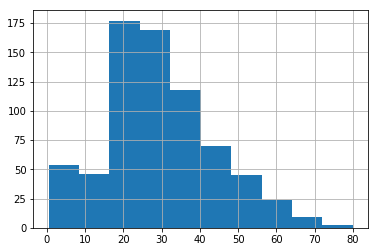

In [9]:
train['Age'].hist()

In [10]:
ageMean =  math.floor(train['Age'].mean())
ageMeanT =  math.floor(test['Age'].mean())
train['Age'] = train['Age'].fillna(ageMean)
test['Age'] = test['Age'].fillna(ageMeanT)

FareMeanT =  math.floor(test['Fare'].mean())
test['Fare'] = test['Fare'].fillna(FareMeanT)            

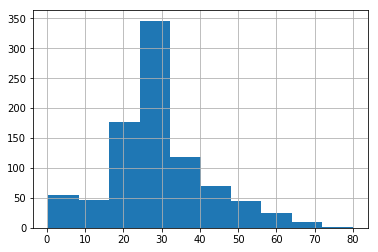

In [11]:
train['Age'].hist()

In [12]:
first = train['Cabin'].mode()
first = first [0]
firstT = test['Cabin'].mode()
firstT = firstT[0]
test['Cabin'] = test['Cabin'].fillna(firstT)
train['Cabin'] = train['Cabin'].fillna(first)

In [13]:
EmbarkedMax = train['Embarked'].mode()
train['Embarked'] = train['Embarked'].fillna(EmbarkedMax[0])

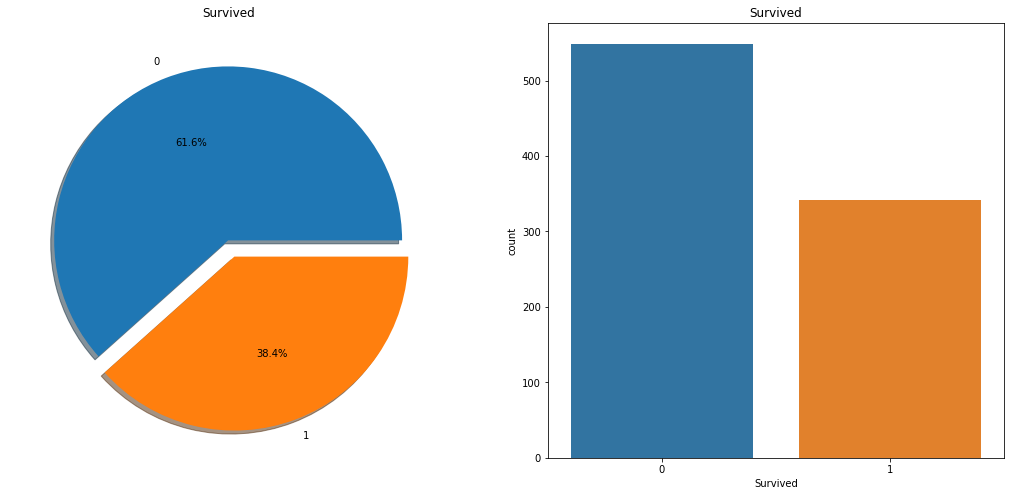

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train)
ax[1].set_title('Survived')
plt.show()

Text(0.5, 1.0, 'Sex:Survived vs Dead')

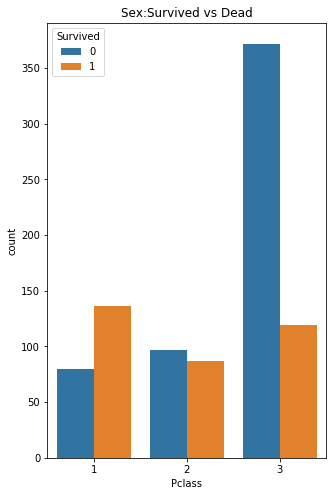

In [15]:
plt.subplots(figsize=(5,8))
ax =sns.countplot('Pclass',hue='Survived',data=train)
ax.set_title('Sex:Survived vs Dead')

In [16]:
train.Age = train.Age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(train.Age, bins, labels=group_names)
train.Age = categories

In [17]:
train['Age'].head(n=10)

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
5    Young Adult
6          Adult
7           Baby
8    Young Adult
9       Teenager
Name: Age, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [18]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [260]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [261]:
df_train_T = train;
df_train_T = transform_features(df_train_T);

df_test_T = test;
df_test_T = transform_features(df_test_T);

df_train_T.head(n=5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [262]:
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

In [265]:
#Encode Dataset
df_train, df_test = encode_features(df_train_T, df_test_T)
df_train.head(n=5)
# df_test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [264]:
transformed_df = pd.get_dummies(df_train)
# transformed_df = pd.get_dummies(y_all)
# transformed_df

In [190]:
x_all = transformed_df.drop(['Survived', 'PassengerId'], axis=1)
y_all = transformed_df['Survived']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.3, random_state=123)

In [192]:
round(len(X_train)/len(x_all)*100)

70

In [156]:
X_train.shape

(623, 9)

In [245]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
nn2.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['mean_squared_error', 'accuracy'])

# Model summary
print(nn2.summary())

# Visualising the neural network
# SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               1280      
_________________________________________________________________
dense_106 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_107 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 257       
Total params: 100,353
Trainable params: 100,353
Non-trainable params: 0
_________________________________________________________________
None


In [248]:
model = models.Sequential()
model.add(layers.Dense(units=128, input_dim=9,
  activation='tanh')) 
model.add(layers.Dense(units=256, input_dim=9,
  activation='relu')) 
model.add(layers.Dense(units=256, input_dim=9,
  activation='relu'))
model.add(layers.Dense(units=128, input_dim=9,
  activation='relu'))
model.add(layers.Dense(units=128, input_dim=4,
  activation='relu'))
model.add(layers.Dense(units=64, input_dim=2,
  activation='tanh'))
model.add(layers.Dense(units=8, activation='tanh')) 
model.add(layers.Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 128)               1280      
_________________________________________________________________
dense_118 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_119 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_120 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_121 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_122 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_123 (Dense)            (None, 8)                 520       
__________

In [249]:
# Training the model
nn2_start = time.time()

nn2_history = model.fit(X_train,
                  y_train,
                  epochs=400,
                  batch_size=256,
                  validation_split = 0.2)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Train on 498 samples, validate on 125 samples
Epoch 1/400
498/498 [==============================] - ETA: 1s - loss: 0.6858 - acc: 0.625 - 1s 3ms/step - loss: 0.6787 - acc: 0.6265 - val_loss: 0.7269 - val_acc: 0.5440
Epoch 2/400
498/498 [==============================] - ETA: 0s - loss: 0.6634 - acc: 0.628 - 0s 40us/step - loss: 0.6635 - acc: 0.6245 - val_loss: 0.6920 - val_acc: 0.5440
Epoch 3/400
498/498 [==============================] - ETA: 0s - loss: 0.6527 - acc: 0.660 - 0s 30us/step - loss: 0.6652 - acc: 0.6245 - val_loss: 0.6993 - val_acc: 0.5440
Epoch 4/400
498/498 [==============================] - ETA: 0s - loss: 0.6635 - acc: 0.617 - 0s 32us/step - loss: 0.6604 - acc: 0.6245 - val_loss: 0.7060 - val_acc: 0.5440
Epoch 5/400
498/498 [==============================] - ETA: 0s - loss: 0.6519 - acc: 0.640 - 0s 32us/step - loss: 0.6605 - acc: 0.6245 - val_loss: 0.7070 - val_acc: 0.5440
Epoch 6/400
498/498 [==============================] - ETA: 0s - loss: 0.6520 - acc: 0.636 - 0s

498/498 [==============================] - ETA: 0s - loss: 0.5854 - acc: 0.695 - 0s 30us/step - loss: 0.5434 - acc: 0.7269 - val_loss: 0.6794 - val_acc: 0.6000
Epoch 49/400
498/498 [==============================] - ETA: 0s - loss: 0.4784 - acc: 0.796 - 0s 28us/step - loss: 0.5157 - acc: 0.7631 - val_loss: 0.6874 - val_acc: 0.5920
Epoch 50/400
498/498 [==============================] - ETA: 0s - loss: 0.5115 - acc: 0.742 - 0s 30us/step - loss: 0.5060 - acc: 0.7590 - val_loss: 0.6650 - val_acc: 0.6240
Epoch 51/400
498/498 [==============================] - ETA: 0s - loss: 0.4923 - acc: 0.777 - 0s 28us/step - loss: 0.5028 - acc: 0.7651 - val_loss: 0.6595 - val_acc: 0.6240
Epoch 52/400
498/498 [==============================] - ETA: 0s - loss: 0.4886 - acc: 0.785 - 0s 30us/step - loss: 0.5171 - acc: 0.7651 - val_loss: 0.6894 - val_acc: 0.6800
Epoch 53/400
498/498 [==============================] - ETA: 0s - loss: 0.5546 - acc: 0.738 - 0s 28us/step - loss: 0.5663 - acc: 0.7309 - val_loss: 

498/498 [==============================] - ETA: 0s - loss: 0.3920 - acc: 0.808 - 0s 26us/step - loss: 0.4039 - acc: 0.8112 - val_loss: 0.5001 - val_acc: 0.8160
Epoch 96/400
498/498 [==============================] - ETA: 0s - loss: 0.3940 - acc: 0.843 - 0s 28us/step - loss: 0.3796 - acc: 0.8474 - val_loss: 0.5313 - val_acc: 0.7680
Epoch 97/400
498/498 [==============================] - ETA: 0s - loss: 0.3728 - acc: 0.843 - 0s 26us/step - loss: 0.3778 - acc: 0.8394 - val_loss: 0.5188 - val_acc: 0.8000
Epoch 98/400
498/498 [==============================] - ETA: 0s - loss: 0.3747 - acc: 0.851 - 0s 28us/step - loss: 0.3886 - acc: 0.8394 - val_loss: 0.5527 - val_acc: 0.7440
Epoch 99/400
498/498 [==============================] - ETA: 0s - loss: 0.3365 - acc: 0.871 - 0s 26us/step - loss: 0.3816 - acc: 0.8394 - val_loss: 0.6198 - val_acc: 0.7360
Epoch 100/400
498/498 [==============================] - ETA: 0s - loss: 0.5062 - acc: 0.773 - 0s 28us/step - loss: 0.4416 - acc: 0.8112 - val_loss:

498/498 [==============================] - ETA: 0s - loss: 0.3750 - acc: 0.847 - 0s 28us/step - loss: 0.3599 - acc: 0.8594 - val_loss: 0.4755 - val_acc: 0.8080
Epoch 143/400
498/498 [==============================] - ETA: 0s - loss: 0.3930 - acc: 0.835 - 0s 32us/step - loss: 0.3371 - acc: 0.8635 - val_loss: 0.5085 - val_acc: 0.7760
Epoch 144/400
498/498 [==============================] - ETA: 0s - loss: 0.3368 - acc: 0.847 - 0s 30us/step - loss: 0.3380 - acc: 0.8614 - val_loss: 0.4974 - val_acc: 0.8080
Epoch 145/400
498/498 [==============================] - ETA: 0s - loss: 0.4217 - acc: 0.828 - 0s 30us/step - loss: 0.4187 - acc: 0.8173 - val_loss: 0.5023 - val_acc: 0.8080
Epoch 146/400
498/498 [==============================] - ETA: 0s - loss: 0.3941 - acc: 0.855 - 0s 30us/step - loss: 0.5055 - acc: 0.7691 - val_loss: 0.5065 - val_acc: 0.8080
Epoch 147/400
498/498 [==============================] - ETA: 0s - loss: 0.3290 - acc: 0.875 - 0s 30us/step - loss: 0.3867 - acc: 0.8414 - val_l

498/498 [==============================] - ETA: 0s - loss: 0.3538 - acc: 0.843 - 0s 26us/step - loss: 0.3613 - acc: 0.8554 - val_loss: 0.6512 - val_acc: 0.7680
Epoch 190/400
498/498 [==============================] - ETA: 0s - loss: 0.4810 - acc: 0.816 - 0s 28us/step - loss: 0.4132 - acc: 0.8434 - val_loss: 0.5513 - val_acc: 0.7440
Epoch 191/400
498/498 [==============================] - ETA: 0s - loss: 0.3580 - acc: 0.855 - 0s 28us/step - loss: 0.3688 - acc: 0.8494 - val_loss: 0.5578 - val_acc: 0.7840
Epoch 192/400
498/498 [==============================] - ETA: 0s - loss: 0.3362 - acc: 0.859 - 0s 28us/step - loss: 0.3663 - acc: 0.8434 - val_loss: 0.5517 - val_acc: 0.7360
Epoch 193/400
498/498 [==============================] - ETA: 0s - loss: 0.3859 - acc: 0.832 - 0s 28us/step - loss: 0.3725 - acc: 0.8373 - val_loss: 0.4966 - val_acc: 0.8000
Epoch 194/400
498/498 [==============================] - ETA: 0s - loss: 0.3491 - acc: 0.855 - 0s 30us/step - loss: 0.3519 - acc: 0.8614 - val_l

498/498 [==============================] - ETA: 0s - loss: 0.2890 - acc: 0.882 - 0s 26us/step - loss: 0.2941 - acc: 0.8815 - val_loss: 0.4748 - val_acc: 0.8320
Epoch 237/400
498/498 [==============================] - ETA: 0s - loss: 0.2828 - acc: 0.894 - 0s 28us/step - loss: 0.2835 - acc: 0.8976 - val_loss: 0.4632 - val_acc: 0.8320
Epoch 238/400
498/498 [==============================] - ETA: 0s - loss: 0.2964 - acc: 0.890 - 0s 26us/step - loss: 0.2975 - acc: 0.8896 - val_loss: 0.4610 - val_acc: 0.8480
Epoch 239/400
498/498 [==============================] - ETA: 0s - loss: 0.3584 - acc: 0.855 - 0s 28us/step - loss: 0.3344 - acc: 0.8574 - val_loss: 0.5153 - val_acc: 0.7920
Epoch 240/400
498/498 [==============================] - ETA: 0s - loss: 0.2622 - acc: 0.898 - 0s 30us/step - loss: 0.3584 - acc: 0.8554 - val_loss: 0.5481 - val_acc: 0.7520
Epoch 241/400
498/498 [==============================] - ETA: 0s - loss: 0.3068 - acc: 0.851 - 0s 28us/step - loss: 0.3911 - acc: 0.8233 - val_l

498/498 [==============================] - ETA: 0s - loss: 0.3248 - acc: 0.855 - 0s 28us/step - loss: 0.2897 - acc: 0.8896 - val_loss: 0.4907 - val_acc: 0.8080
Epoch 284/400
498/498 [==============================] - ETA: 0s - loss: 0.3053 - acc: 0.878 - 0s 28us/step - loss: 0.2958 - acc: 0.8876 - val_loss: 0.4840 - val_acc: 0.8080
Epoch 285/400
498/498 [==============================] - ETA: 0s - loss: 0.2707 - acc: 0.910 - 0s 28us/step - loss: 0.2843 - acc: 0.9016 - val_loss: 0.4609 - val_acc: 0.8400
Epoch 286/400
498/498 [==============================] - ETA: 0s - loss: 0.2795 - acc: 0.906 - 0s 30us/step - loss: 0.2937 - acc: 0.8916 - val_loss: 0.4809 - val_acc: 0.8240
Epoch 287/400
498/498 [==============================] - ETA: 0s - loss: 0.3263 - acc: 0.890 - 0s 28us/step - loss: 0.2891 - acc: 0.8976 - val_loss: 0.4969 - val_acc: 0.8240
Epoch 288/400
498/498 [==============================] - ETA: 0s - loss: 0.2653 - acc: 0.906 - 0s 28us/step - loss: 0.2845 - acc: 0.8916 - val_l

498/498 [==============================] - ETA: 0s - loss: 0.3465 - acc: 0.851 - 0s 28us/step - loss: 0.3230 - acc: 0.8675 - val_loss: 0.5878 - val_acc: 0.7840
Epoch 331/400
498/498 [==============================] - ETA: 0s - loss: 0.4132 - acc: 0.824 - 0s 28us/step - loss: 0.3650 - acc: 0.8454 - val_loss: 0.5965 - val_acc: 0.7680
Epoch 332/400
498/498 [==============================] - ETA: 0s - loss: 0.3967 - acc: 0.824 - 0s 28us/step - loss: 0.3629 - acc: 0.8494 - val_loss: 0.5520 - val_acc: 0.7840
Epoch 333/400
498/498 [==============================] - ETA: 0s - loss: 0.3464 - acc: 0.855 - 0s 26us/step - loss: 0.3337 - acc: 0.8695 - val_loss: 0.5242 - val_acc: 0.7920
Epoch 334/400
498/498 [==============================] - ETA: 0s - loss: 0.2741 - acc: 0.894 - 0s 28us/step - loss: 0.3343 - acc: 0.8614 - val_loss: 0.4940 - val_acc: 0.8320
Epoch 335/400
498/498 [==============================] - ETA: 0s - loss: 0.2619 - acc: 0.910 - 0s 30us/step - loss: 0.3268 - acc: 0.8755 - val_l

498/498 [==============================] - ETA: 0s - loss: 0.2853 - acc: 0.882 - 0s 30us/step - loss: 0.2604 - acc: 0.8876 - val_loss: 0.5879 - val_acc: 0.7600
Epoch 378/400
498/498 [==============================] - ETA: 0s - loss: 0.3048 - acc: 0.871 - 0s 30us/step - loss: 0.2939 - acc: 0.8735 - val_loss: 0.4934 - val_acc: 0.8240
Epoch 379/400
498/498 [==============================] - ETA: 0s - loss: 0.2373 - acc: 0.906 - 0s 32us/step - loss: 0.2589 - acc: 0.8956 - val_loss: 0.5295 - val_acc: 0.7920
Epoch 380/400
498/498 [==============================] - ETA: 0s - loss: 0.2761 - acc: 0.878 - 0s 30us/step - loss: 0.2734 - acc: 0.8896 - val_loss: 0.4897 - val_acc: 0.8080
Epoch 381/400
498/498 [==============================] - ETA: 0s - loss: 0.2922 - acc: 0.878 - 0s 28us/step - loss: 0.2694 - acc: 0.8936 - val_loss: 0.4586 - val_acc: 0.8480
Epoch 382/400
498/498 [==============================] - ETA: 0s - loss: 0.2846 - acc: 0.875 - 0s 30us/step - loss: 0.2625 - acc: 0.8916 - val_l

In [250]:
print('Training Accuracy is :', np.mean(nn2_history.history["acc"]))

Training Accuracy is : 0.8339407629157646


In [181]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

In [49]:
# nn_model_evaluation(model)

In [251]:
y_predict = model.predict(X_test)
rounded = [round(x[0]) for x in y_predict]
y_predict1 = np.array(rounded,dtype='int64')
# 

In [266]:
precision_score(y_test,y_predict1)

0.7590361445783133

In [253]:
acc_cv = round(accuracy_score(y_test, y_predict1) * 100, 2)
acc_cv

79.48

In [123]:
# # Logistic Regression
# start_time = time.time()

# train_pred_log, acc_log, acc_cv_log = fit_ml_algo(model, X_train, y_train, 10)

# log_time = (time.time() - start_time)
# print("Accuracy: %s" % acc_log)
# print("Accuracy CV 10-Fold: %s" % acc_cv_log)
# print("Running Time: %s" % datetime.timedelta(seconds=log_time))

In [124]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [ ]:
X_test  = df_test.drop("PassengerId",axis=1)
rfc_prediction = model.predict(X_test)
# X_test
rounded = [round(x[0]) for x in rfc_prediction]
y_predict1 = np.array(rounded,dtype='int64')
    
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict1
    })
submission.to_csv('NN.csv', index=False)